In [11]:
## 1️⃣ Imports and Configuration Paths
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# Optional: interactive plotting in notebook
%matplotlib inline

# Root path (where the notebook sits)
ROOT_DIR = Path(__file__).parent if "__file__" in locals() else Path.cwd()
print(f"Root directory: {ROOT_DIR}")

# Define which subfolders to look for
VNIR_FOLDER = "Hyper"
SWIR_FOLDER = "SWIR"
METADATA_FOLDER = "MetaData"
PANEL_CAL_FILE = ROOT_DIR / "LARGE_PANEL.txt"

# File name pattern to find (only these .bin files)
VNIR_PATTERN = "reorder_*_U16.bin"
SWIR_PATTERN = "Reorder_*_U16.bin"

# Panel calibration file path
PANEL_CAL_FILE = ROOT_DIR / "LARGE_PANEL.txt"


Root directory: C:\Users\eric\Documents\Spectro_Auto_latest_V


🔧 Using X±5.0% and Y±15.0% expansion for SWIR search region.
ROOT_DIR = C:\Users\eric\Documents\Spectro_Auto_latest_V
Found 2 day folders with both Hyper & SWIR.

📅 20241002: 2 VNIR scan folders (ignoring 2 dark folders)
📅 20241002: pairing 2 VNIR ↔ SWIR scans

🔗 Pair #1: 20241002103354_SCN ↔ 20241002103355
Saved preview → reorder_272_2295_640_U16_preview.png


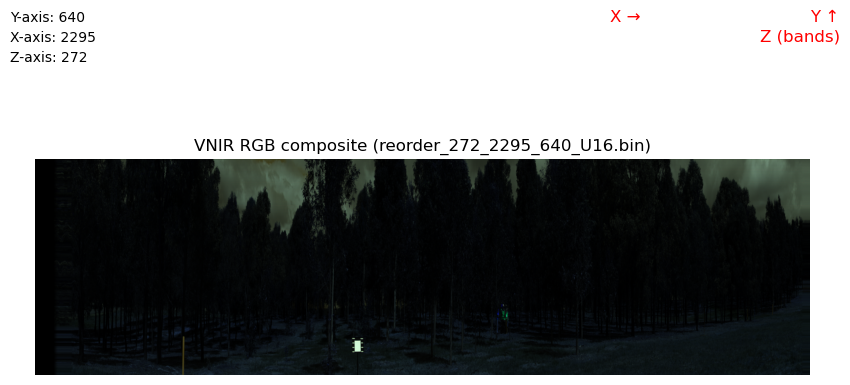

🔍 VNIR detection on reorder_272_2295_640_U16.bin shape=(640, 2295, 272)
Saved panel overlay → reorder_272_2295_640_U16_vnir_panel_grown.png


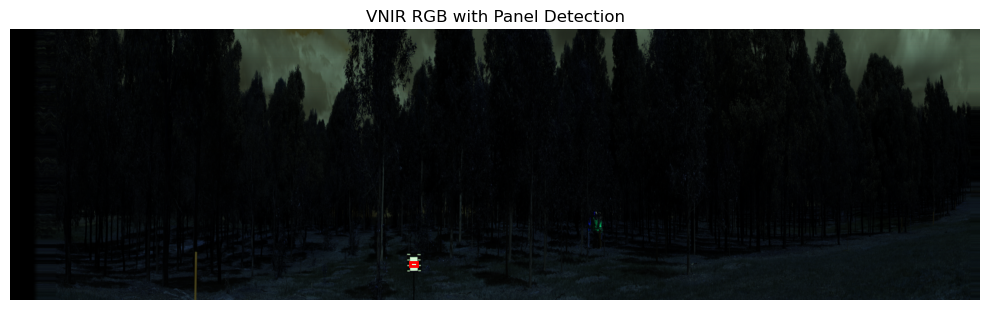

✅ VNIR bbox saved + overlay: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\Hyper\20241002103354_SCN\reorder_272_2295_640_U16_vnir_panel_grown.png


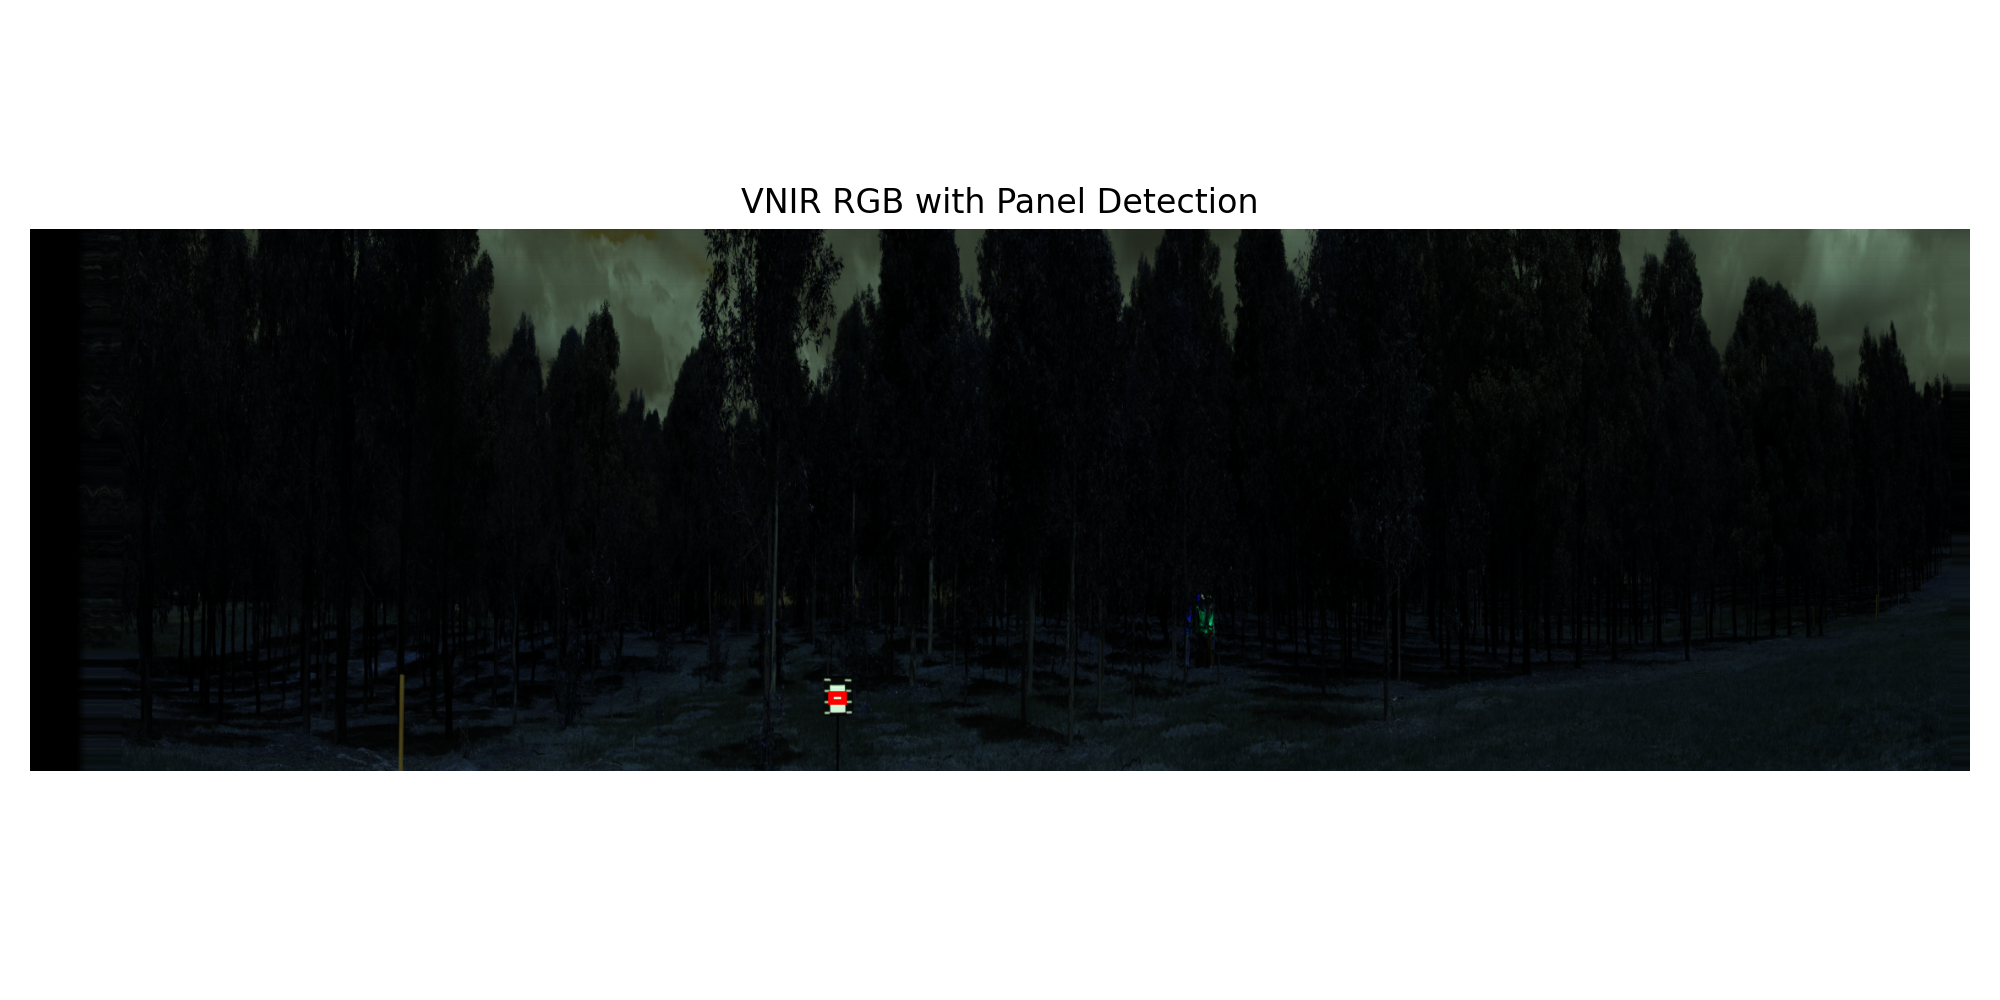

Saved preview → Reorder_288_2334_384_U16_preview.png


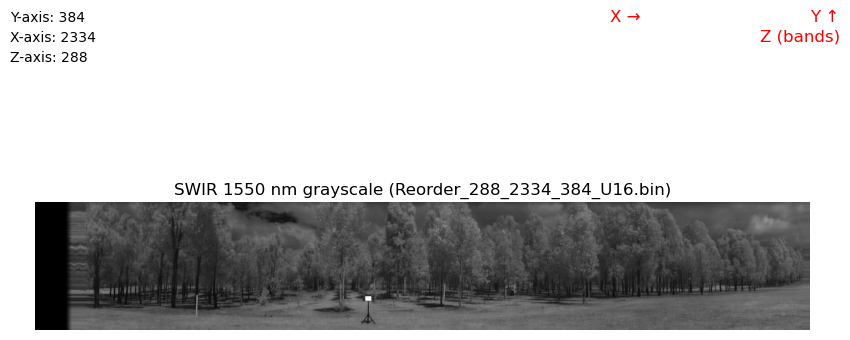

🔍 SWIR local search on Reorder_288_2334_384_U16.bin  shape=(384, 2334, 288)
🔧 Truncated bottom 5.0% (6 rows) from SWIR subcube.
✅ SWIR subcube overlay saved: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002103355\Reorder_288_2334_384_U16_swir_local_subcube.png
✅ SWIR detection JSON saved: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002103355\Reorder_288_2334_384_U16_swir_local_subcube.json


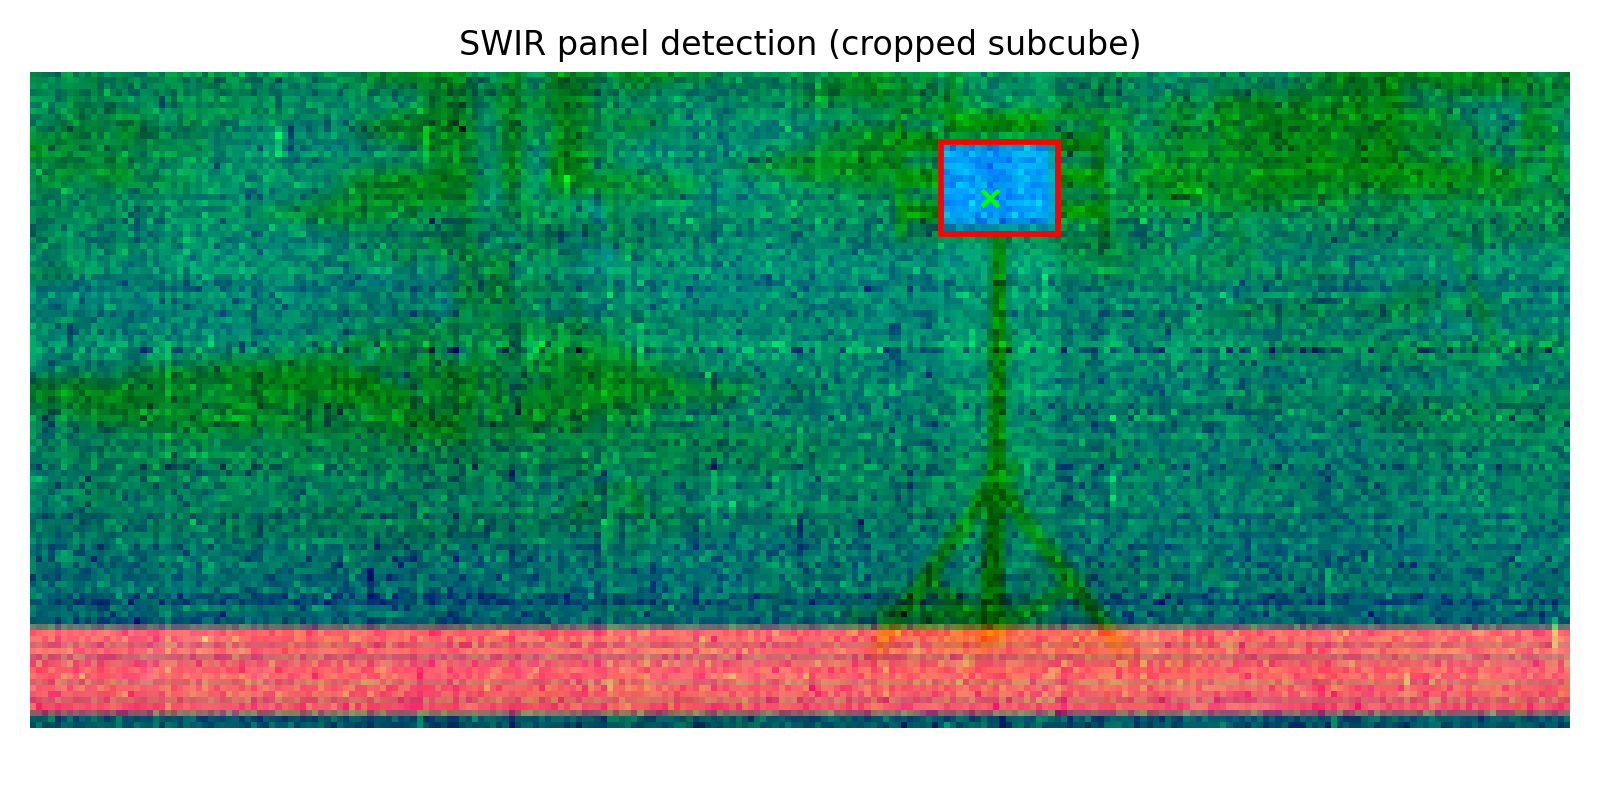

Saved preview → Reorder_288_2334_384_U16_preview.png


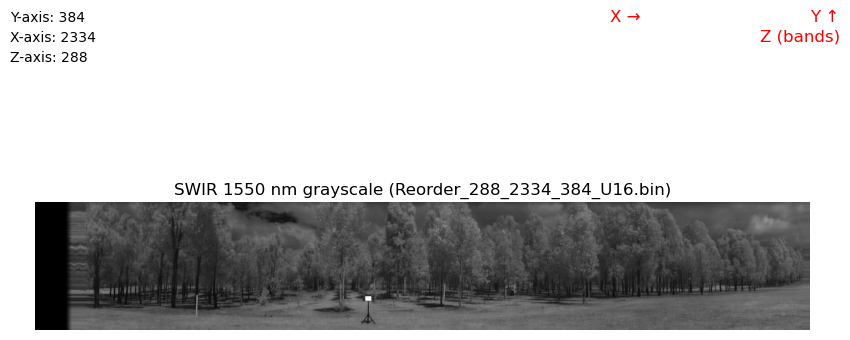

✅ Full SWIR overlay saved (greyscale 1550nm): C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002103355\Reorder_288_2334_384_U16_swir_local_overlay.png


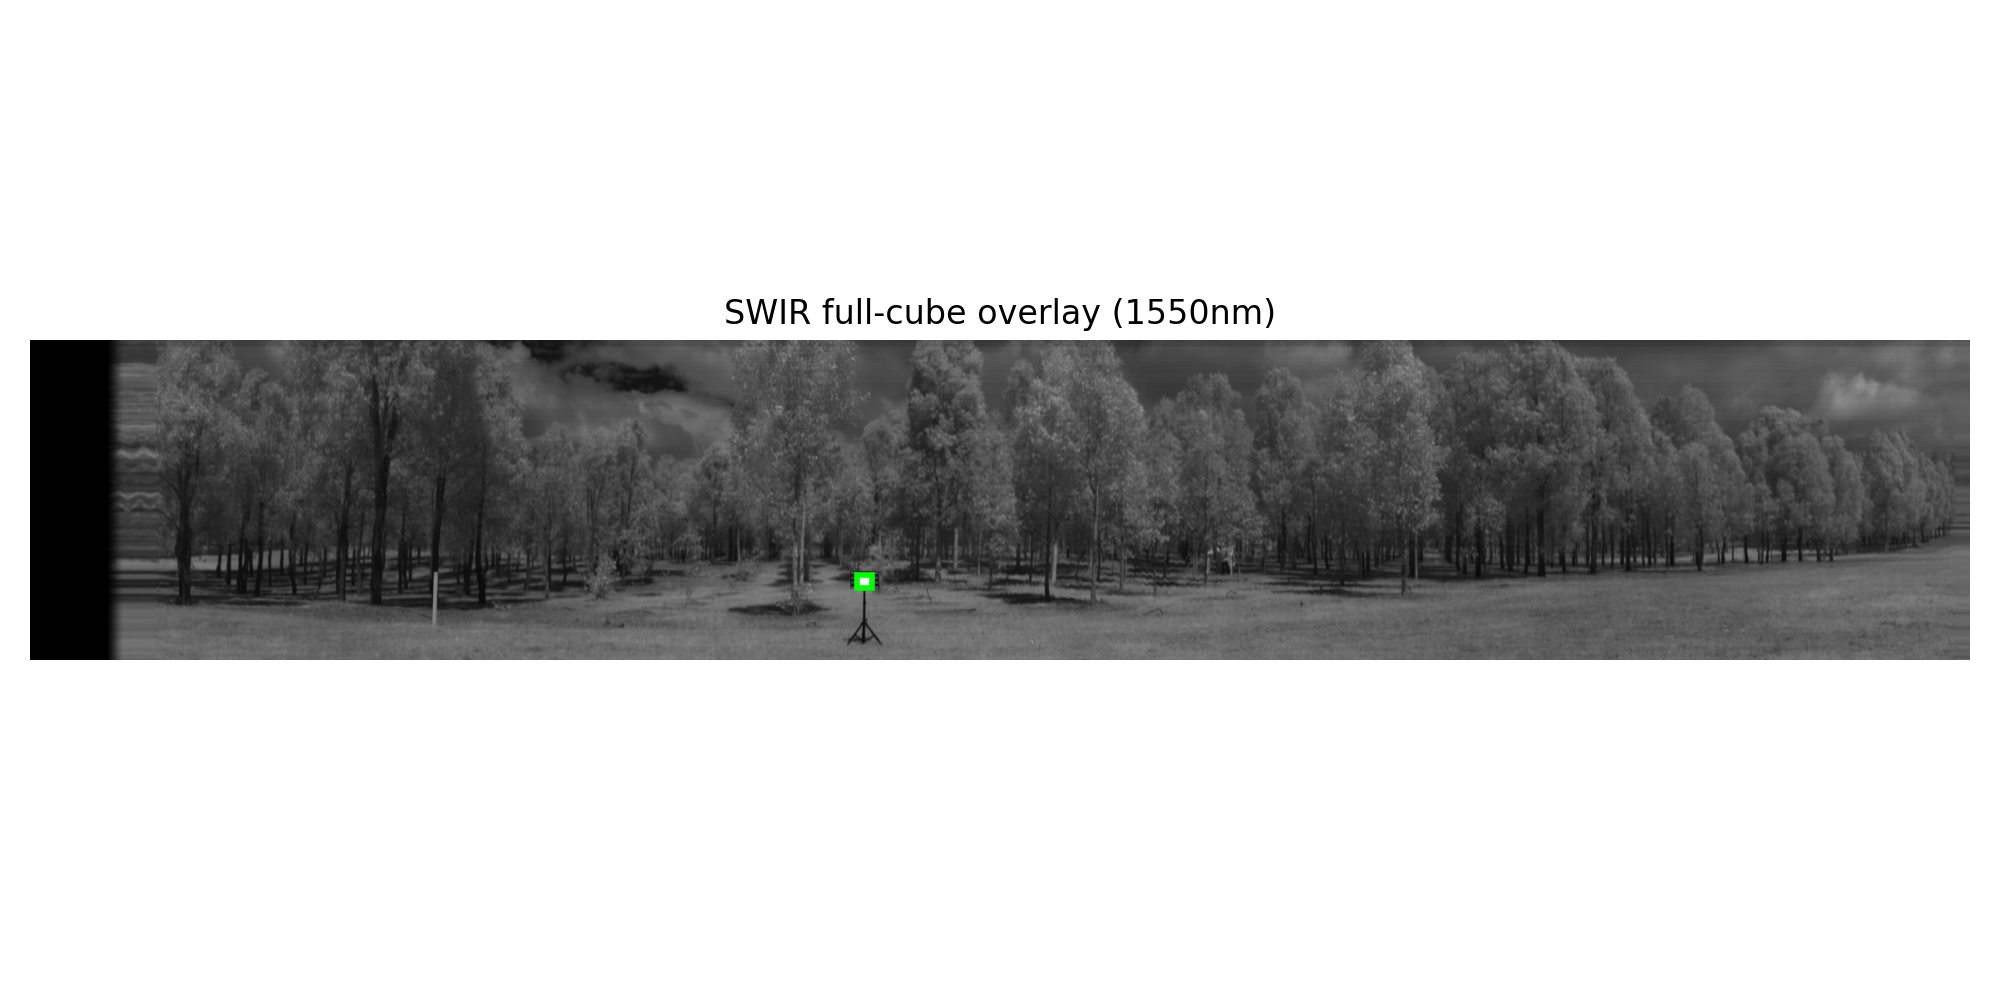

💾 Saved extracted SWIR panel cube: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002103355\Reorder_288_2334_384_U16_panel_cube.npy
💾 VNIR bbox JSON: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\Hyper\20241002103354_SCN\reorder_272_2295_640_U16_vnir_bbox.json
💾 SWIR bbox JSON: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002103355\Reorder_288_2334_384_U16_swir_local_subcube.json

🔗 Pair #2: 20241002113938_SCN ↔ 20241002113938
Saved preview → reorder_272_2125_640_U16_preview.png


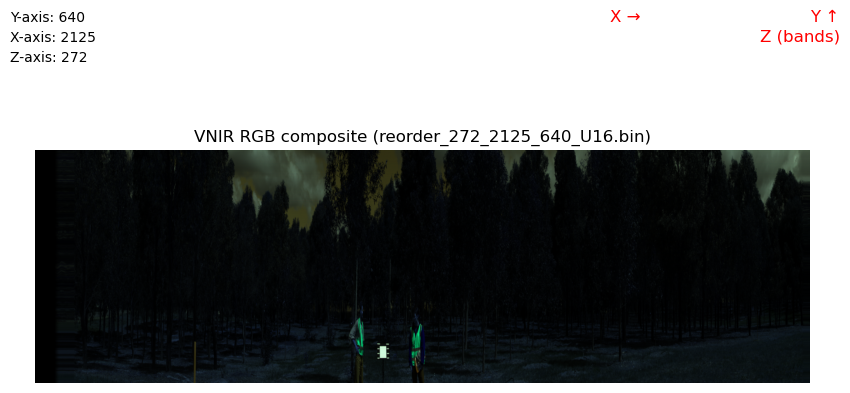

🔍 VNIR detection on reorder_272_2125_640_U16.bin shape=(640, 2125, 272)
Saved panel overlay → reorder_272_2125_640_U16_vnir_panel_grown.png


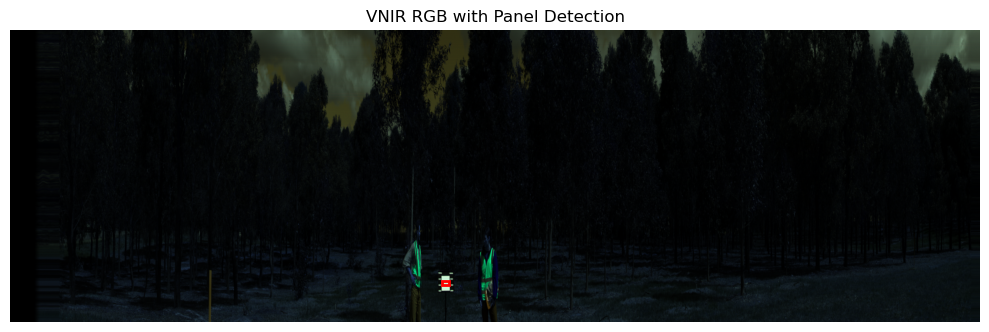

✅ VNIR bbox saved + overlay: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\Hyper\20241002113938_SCN\reorder_272_2125_640_U16_vnir_panel_grown.png


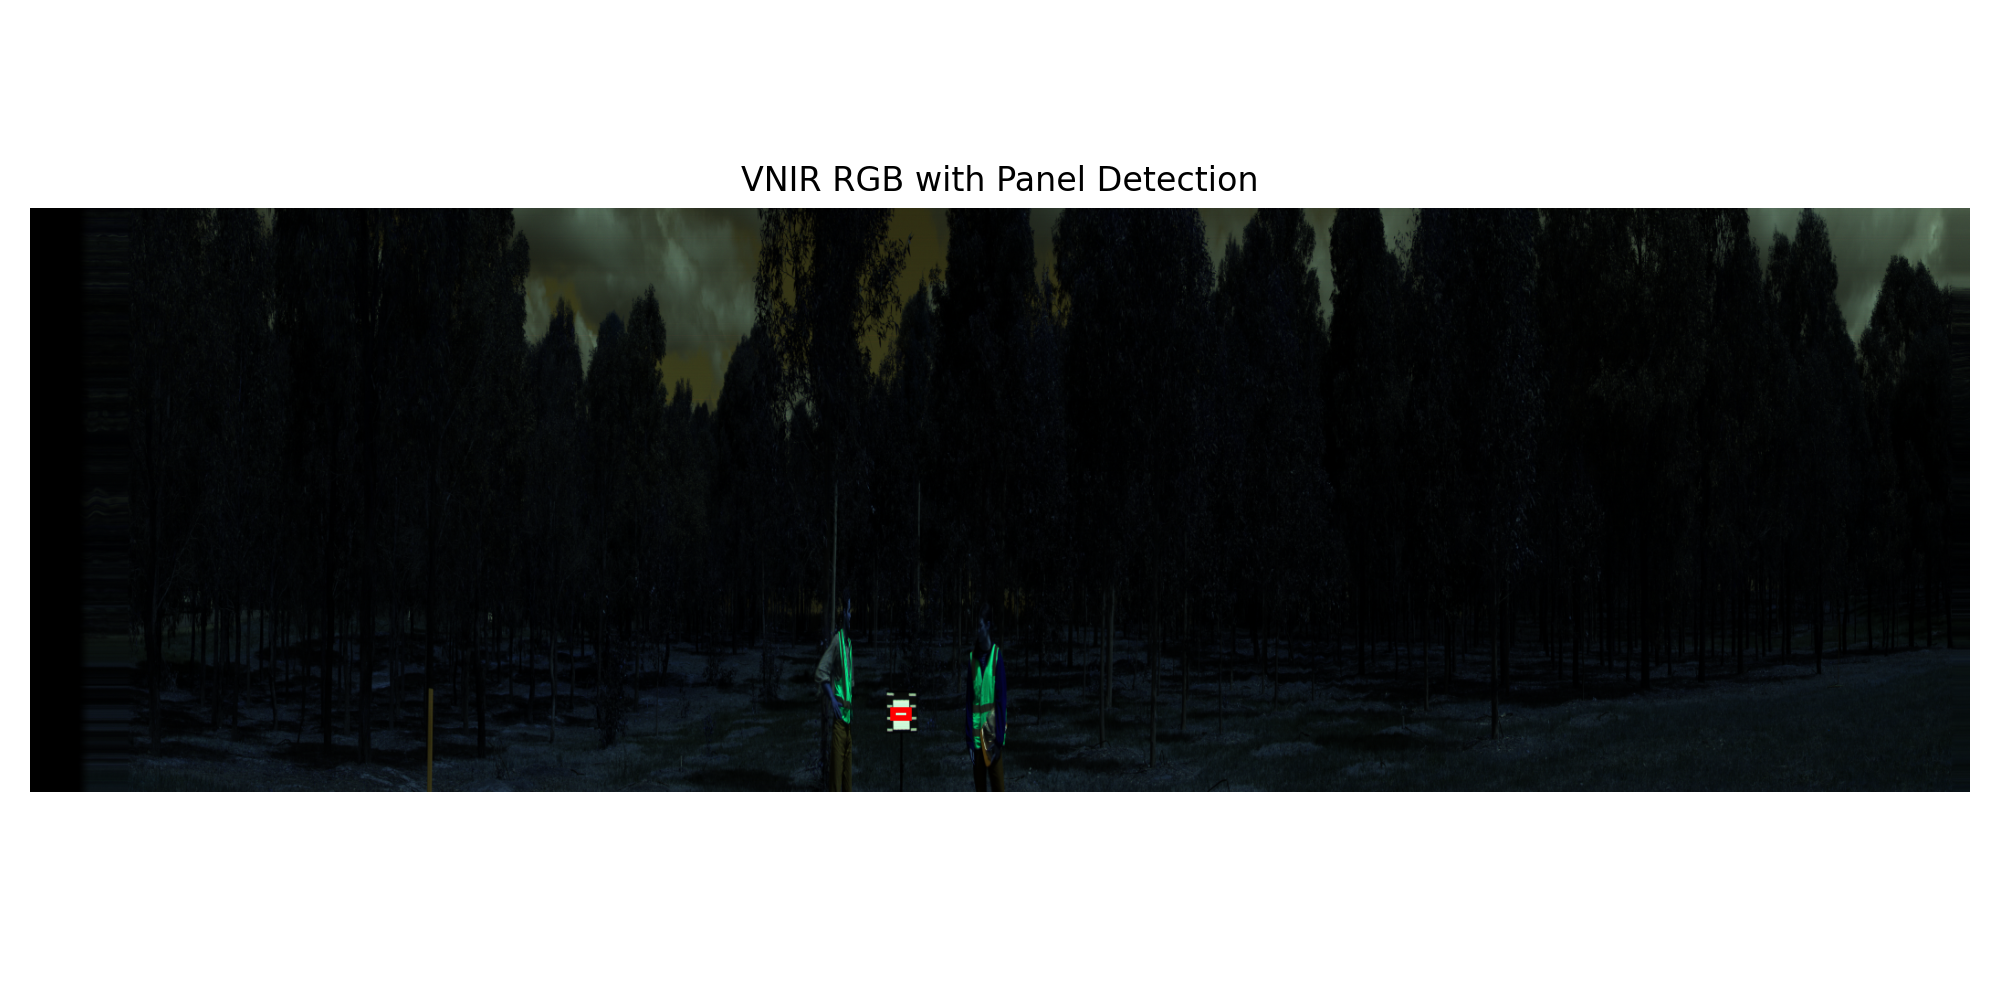

Saved preview → Reorder_288_2154_384_U16_preview.png


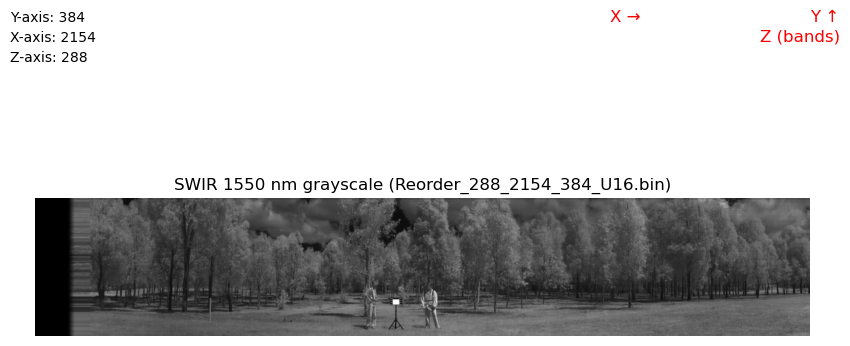

🔍 SWIR local search on Reorder_288_2154_384_U16.bin  shape=(384, 2154, 288)
🔧 Truncated bottom 5.0% (6 rows) from SWIR subcube.
✅ SWIR subcube overlay saved: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002113938\Reorder_288_2154_384_U16_swir_local_subcube.png
✅ SWIR detection JSON saved: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002113938\Reorder_288_2154_384_U16_swir_local_subcube.json


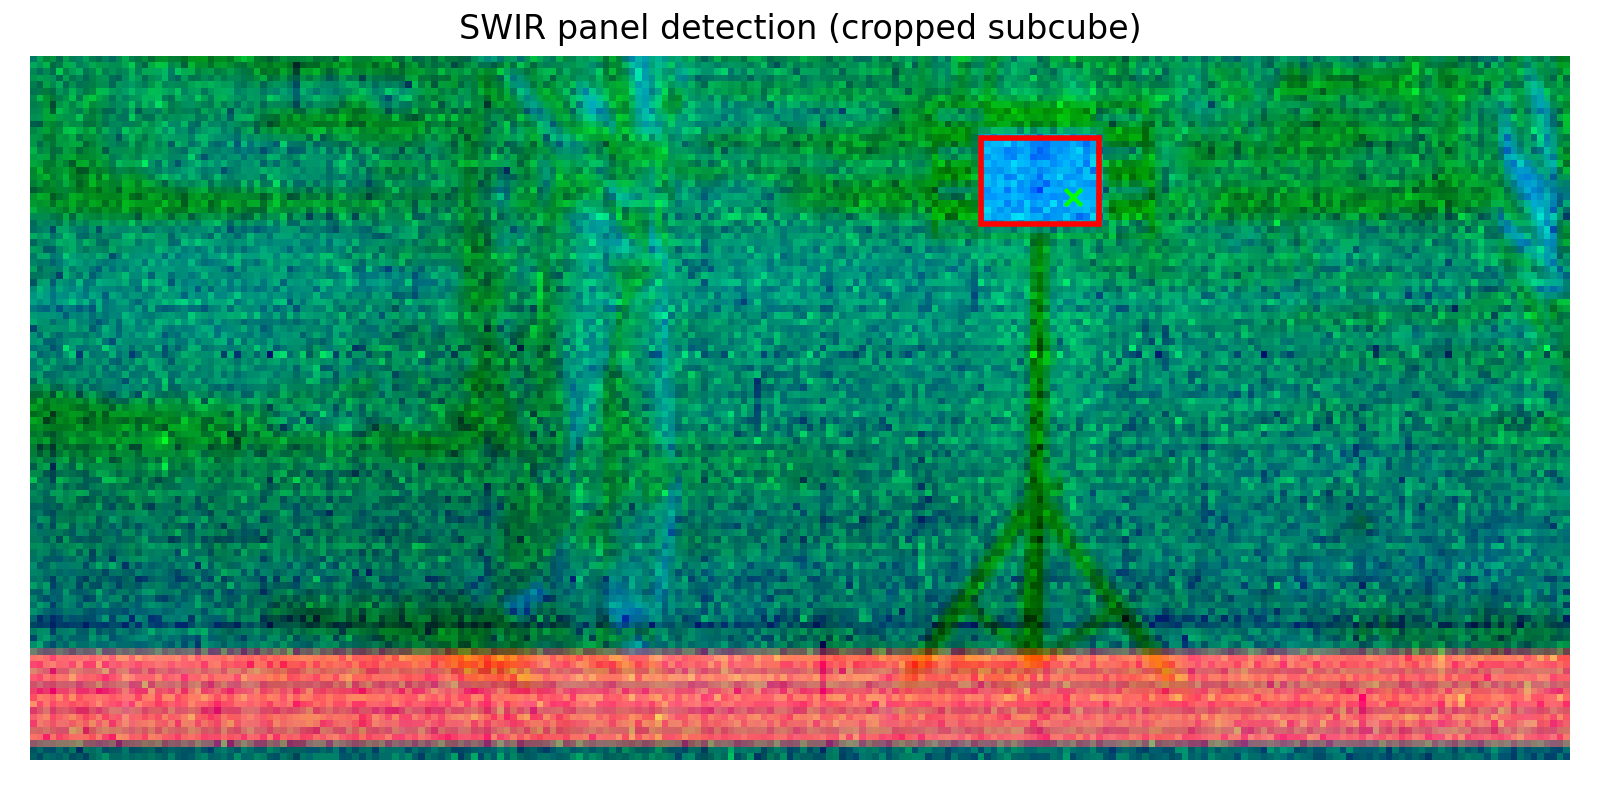

Saved preview → Reorder_288_2154_384_U16_preview.png


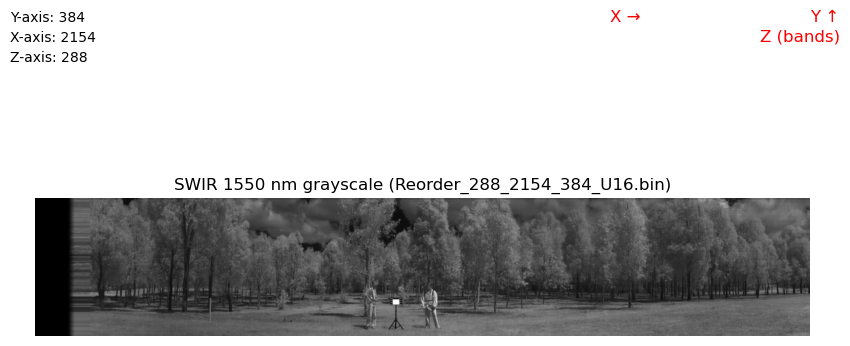

✅ Full SWIR overlay saved (greyscale 1550nm): C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002113938\Reorder_288_2154_384_U16_swir_local_overlay.png


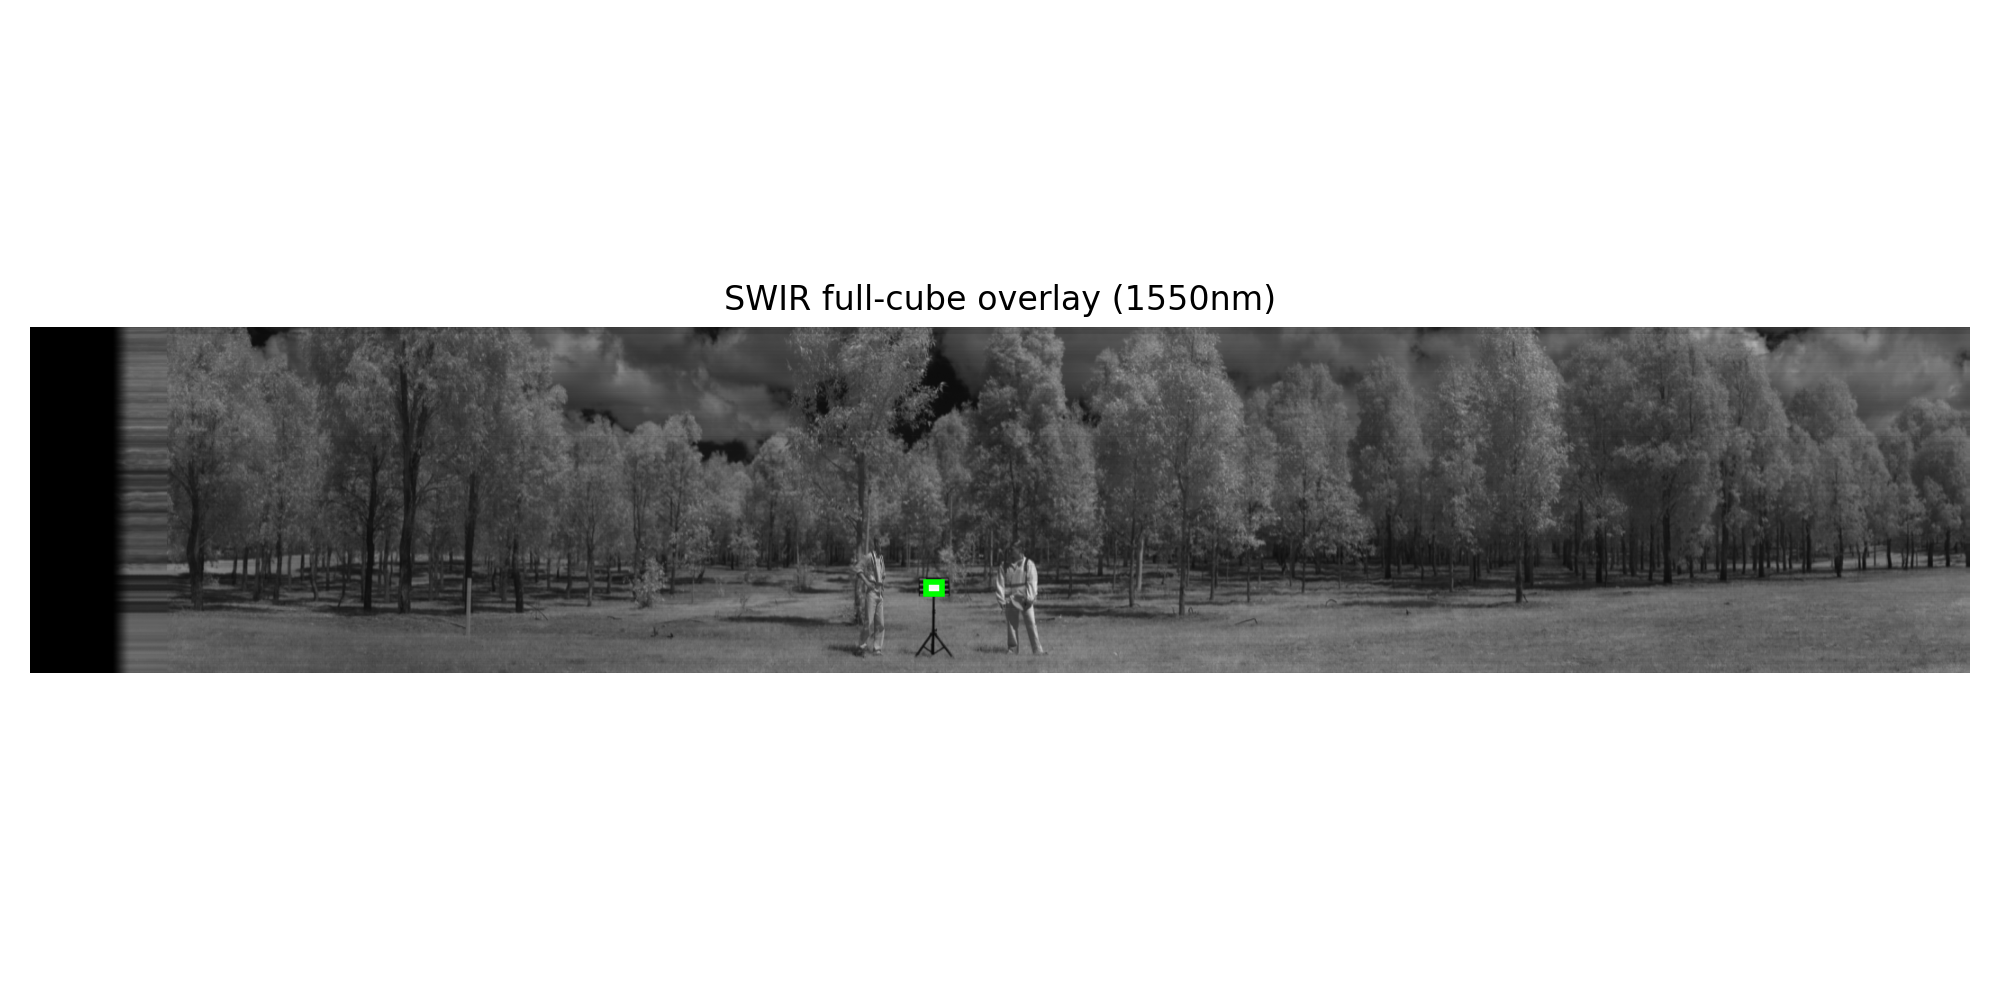

💾 Saved extracted SWIR panel cube: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002113938\Reorder_288_2154_384_U16_panel_cube.npy
💾 VNIR bbox JSON: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\Hyper\20241002113938_SCN\reorder_272_2125_640_U16_vnir_bbox.json
💾 SWIR bbox JSON: C:\Users\eric\Documents\Spectro_Auto_latest_V\20241002\SWIR\20241002113938\Reorder_288_2154_384_U16_swir_local_subcube.json

📅 20250313: 2 VNIR scan folders (ignoring 2 dark folders)
📅 20250313: pairing 2 VNIR ↔ SWIR scans

🔗 Pair #1: 20250313110542_SCN ↔ 20250313110542
Saved preview → reorder_272_1037_640_U16_preview.png


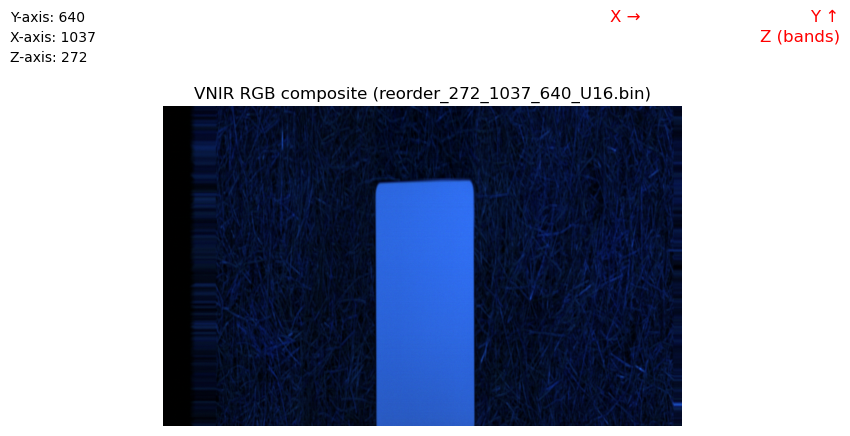

🔍 VNIR detection on reorder_272_1037_640_U16.bin shape=(640, 1037, 272)


In [ ]:
## Test - re-apply SWIR panel detection to original cube


import importlib, gc, json
from pathlib import Path
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from skimage import measure, morphology
from scipy.ndimage import uniform_filter
from IPython.display import display, Image

# reload pipeline module if needed
importlib.reload(prp)
from panel_reflectance_pipeline import import_datacube, visualize_panel_detection

# ============================================================
# CONFIGURATION: VNIR + SWIR detection parameters
# ============================================================

# --- VNIR panel detection ---
vnir_tolerance_seed_patch = 0.4        # Tolerance for finding uniform bright patch
vnir_tolerance_region_grow = 0.45      # Tolerance for region-growing expansion
vnir_min_patch = 6                      # Minimum patch size to consider as seed
vnir_max_candidates = 5000              # Maximum candidate pixels to test

# --- SWIR panel detection ---
swir_tolerance_seed_patch = 0.3        # Tolerance for finding uniform bright patch in SWIR subcube, lower = stricter, less inclusive
swir_tolerance_region_grow = 0.3       # Tolerance for region-growing expansion in SWIR subcube, lower = stricter, less inclusive
swir_min_patch = 10                     # Minimum patch size for candidate detection
swir_max_candidates = 2000              # Maximum pixels to test for seed

# --- SWIR search box expansion ---
percent_increase_SWIR_search_x = 0.05  # ±5% horizontal expansion
percent_increase_SWIR_search_y = 0.15  # ±15% vertical expansion
print(f"🔧 Using X±{percent_increase_SWIR_search_x*100:.1f}% and "
      f"Y±{percent_increase_SWIR_search_y*100:.1f}% expansion for SWIR search region.")


# ============================================================
# Helper functions
# ============================================================

def select_informative_swir_wavelengths(wavelengths):
    target_bands = [1000, 1300, 1550, 1800, 2200]
    return [np.argmin(np.abs(wavelengths - w)) for w in target_bands]

def robust_adaptive_threshold(region_sm, percentile=95, std_factor=1.5):
    p_thresh = np.nanpercentile(region_sm, percentile)
    s = np.nanstd(region_sm)
    return p_thresh + std_factor * s

def ensure_python_numbers(obj):
    if isinstance(obj, dict):
        return {k: ensure_python_numbers(v) for k,v in obj.items()}
    elif isinstance(obj, (list, tuple, set)):
        cls = type(obj)
        return cls(ensure_python_numbers(x) for x in obj)
    elif isinstance(obj, (np.integer, np.int32, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float32, np.float64)):
        return float(obj)
    else:
        return obj

def normalize_for_detection(region):
    p1, p99 = np.nanpercentile(region, [1, 99])
    if p99 - p1 < 1e-6:
        return np.zeros_like(region)
    return np.clip((region - p1) / (p99 - p1), 0, 1)

def advanced_morphological_cleanup(mask, min_area=10, max_area_ratio=0.3):
    mask = morphology.remove_small_objects(mask.astype(bool), min_size=min_area)
    labeled = measure.label(mask)
    props = measure.regionprops(labeled)
    total_area = mask.shape[0] * mask.shape[1]
    filtered_mask = np.zeros_like(mask)
    for prop in props:
        if prop.area <= max_area_ratio * total_area:
            filtered_mask[labeled==prop.label] = True
    filtered_mask = morphology.binary_closing(filtered_mask, morphology.square(5))
    filtered_mask = morphology.binary_opening(filtered_mask, morphology.square(3))
    return filtered_mask

def _clip_bbox(bbox, h, w):
    x1, y1, x2, y2 = bbox
    x1 = int(np.clip(int(x1), 0, w-1)); x2 = int(np.clip(int(x2), 0, w-1))
    y1 = int(np.clip(int(y1), 0, h-1)); y2 = int(np.clip(int(y2), 0, h-1))
    if x1 > x2: x1, x2 = x2, x1
    if y1 > y2: y1, y2 = y2, y1
    return (x1, y1, x2, y2)

def map_vnir_to_swir_direct(vnir_bbox, vnir_shape, swir_shape):
    x1, y1, x2, y2 = map(int, vnir_bbox)
    v_h, v_w = int(vnir_shape[0]), int(vnir_shape[1])
    s_h, s_w = int(swir_shape[0]), int(swir_shape[1])
    x1_s = int(round(x1 * s_w / v_w))
    x2_s = int(round(x2 * s_w / v_w))
    y1_s = int(round(y1 * s_h / v_h))
    y2_s = int(round(y2 * s_h / v_h))
    return _clip_bbox((x1_s, y1_s, x2_s, y2_s), s_h, s_w)

def build_expanded_search_box(swir_bbox, swir_shape, pct_x=0.05, pct_y=0.2):
    s_h, s_w = swir_shape[:2]
    x1, y1, x2, y2 = swir_bbox
    pad_x = int(round(pct_x * s_w))
    pad_y = int(round(pct_y * s_h))
    return _clip_bbox((x1-pad_x, y1-pad_y, x2+pad_x, y2+pad_y), s_h, s_w)


# ============================================================
# VNIR detection functions
# ============================================================

def find_uniform_bright_patch_priority_VNIR(cube):
    Y, X, B = cube.shape
    brightness_map = cube.mean(axis=2)
    pixels_yx = np.array(np.unravel_index(np.argsort(-brightness_map.ravel()), brightness_map.shape)).T
    checked = set()
    for y0, x0 in pixels_yx[:vnir_max_candidates]:
        if (y0, x0) in checked: continue
        y_start = max(0, y0 - vnir_min_patch//2)
        x_start = max(0, x0 - vnir_min_patch//2)
        y_end = min(Y, y_start + vnir_min_patch)
        x_end = min(X, x_start + vnir_min_patch)
        region_cube = cube[y_start:y_end, x_start:x_end, :]
        if region_cube.shape[0] < vnir_min_patch or region_cube.shape[1] < vnir_min_patch:
            checked.add((y0, x0)); continue
        central_pixel = region_cube[vnir_min_patch//2, vnir_min_patch//2, :]
        lower_bound = central_pixel * (1 - vnir_tolerance_seed_patch)
        upper_bound = central_pixel * (1 + vnir_tolerance_seed_patch)
        uniform_mask = np.all((region_cube >= lower_bound) & (region_cube <= upper_bound), axis=2)
        if np.all(uniform_mask):
            return (x0, y0)
        checked.add((y0, x0))
    return None

def grow_panel_from_seed_VNIR(cube, seed_pixel):
    Y, X, B = cube.shape
    mask = np.zeros((Y,X), dtype=bool)
    visited = np.zeros((Y,X), dtype=bool)
    sx, sy = seed_pixel
    region_vals = [cube[sy, sx, :]]
    queue = deque([(sy, sx)])
    while queue:
        y, x = queue.popleft()
        if visited[y, x]: continue
        visited[y, x] = True
        pixel_val = cube[y, x, :]
        mean_spec = np.mean(region_vals, axis=0)
        if np.all((pixel_val >= mean_spec*(1-vnir_tolerance_region_grow)) & 
                  (pixel_val <= mean_spec*(1+vnir_tolerance_region_grow))):
            mask[y, x] = True
            region_vals.append(pixel_val)
            for ny in range(max(0,y-1), min(Y,y+2)):
                for nx in range(max(0,x-1), min(X,x+2)):
                    if not visited[ny,nx] and not mask[ny,nx]:
                        queue.append((ny,nx))
    return mask

def run_vnir_detection(vnir_file):
    cube, wavelengths = import_datacube(vnir_file, verify_orientation=True)
    print(f"🔍 VNIR detection on {vnir_file.name} shape={cube.shape}")
    seed = find_uniform_bright_patch_priority_VNIR(cube)
    if seed is None:
        print("⚠️ No suitable bright patch found for VNIR.")
        return None
    mask = grow_panel_from_seed_VNIR(cube, seed)
    ys, xs = np.where(mask)
    if len(xs)==0 or len(ys)==0:
        print("⚠️ Panel region failed to expand.")
        return None
    bbox = (int(xs.min()), int(ys.min()), int(xs.max()), int(ys.max()))
    save_path = vnir_file.parent / f"{vnir_file.stem}_vnir_panel_grown.png"
    visualize_panel_detection(cube, wavelengths, bbox, save_path=save_path, sensor_type="VNIR")
    json_payload = {"file": str(vnir_file), "bbox": tuple(map(int,bbox)), "shape": tuple(map(int,cube.shape))}
    json_path = vnir_file.parent / f"{vnir_file.stem}_vnir_bbox.json"
    with open(json_path, "w") as f: json.dump(json_payload, f, indent=2)
    print(f"✅ VNIR bbox saved + overlay: {save_path}")
    return bbox, cube.shape, save_path, json_path

def run_swir_local_search_from_vnir(
    swir_file,
    vnir_bbox,
    vnir_shape,
    pct_expand_x=None,
    pct_expand_y=None,
    informative_bands=None,
    percentile=95,
    min_area=10,
    max_area_ratio=0.3,
    debug=True
):
    """
    SWIR panel detection guided by VNIR panel location.
    Uses VNIR-derived search box to crop SWIR cube and detect panel
    using robust patch-based selection + region-growing.

    Returns:
        detected_bbox_full : tuple of ints (x1, y1, x2, y2) in full SWIR cube coordinates
        save_png : Path to PNG overlay
        json_path : Path to JSON payload
        payload : dict of detection info
    """

    if pct_expand_x is None:
        pct_expand_x = percent_increase_SWIR_search_x
    if pct_expand_y is None:
        pct_expand_y = percent_increase_SWIR_search_y

    # --- Load SWIR cube ---
    cube, wavelengths = import_datacube(swir_file, verify_orientation=True)
    Y, X, B = cube.shape
    if debug:
        print(f"🔍 SWIR local search on {swir_file.name}  shape={cube.shape}")

    # --- Map VNIR bbox -> SWIR coordinates and expand ---
    direct_bbox = map_vnir_to_swir_direct(vnir_bbox, vnir_shape, cube.shape)
    search_box = build_expanded_search_box(direct_bbox, cube.shape,
                                           pct_x=pct_expand_x, pct_y=pct_expand_y)
    x1, y1, x2, y2 = search_box
    swir_subcube = cube[y1:y2+1, x1:x2+1, :]

    if swir_subcube.size == 0:
        print("⚠️ SWIR subcube is empty. Returning direct bbox.")
        return direct_bbox, None, None, {"error": "empty_subcube"}

    # --- Optional: truncate bottom 5% of subcube ---
    truncate_pct_y = 0.05
    n_trunc = int(round(swir_subcube.shape[0] * truncate_pct_y))
    swir_subcube_proc = swir_subcube[:-n_trunc, :, :] if n_trunc > 0 else swir_subcube.copy()
    if debug and n_trunc > 0:
        print(f"🔧 Truncated bottom {truncate_pct_y*100:.1f}% ({n_trunc} rows) from SWIR subcube.")

    # --- Select informative bands ---
    if informative_bands is None:
        informative_bands = select_informative_swir_wavelengths(wavelengths)

    # --- Build composite ---
    comp_sub = np.stack([swir_subcube_proc[:, :, i].astype(np.float32) for i in informative_bands], axis=-1)
    brightness = comp_sub.mean(axis=2)
    brightness_norm = normalize_for_detection(brightness)

    # --------------------------
    # Helper: find uniform bright patch (seed)
    # --------------------------
    def find_uniform_bright_patch(comp_region):
        Yc, Xc = comp_region.shape
        pixels_yx = np.array(np.unravel_index(np.argsort(-comp_region.ravel()), comp_region.shape)).T
        checked = set()
        for y0, x0 in pixels_yx[:swir_max_candidates]:
            if (y0, x0) in checked: continue
            y_start = max(0, y0 - swir_min_patch//2)
            x_start = max(0, x0 - swir_min_patch//2)
            y_end = min(Yc, y_start + swir_min_patch)
            x_end = min(Xc, x_start + swir_min_patch)
            patch = comp_region[y_start:y_end, x_start:x_end]
            if patch.shape[0] < swir_min_patch or patch.shape[1] < swir_min_patch:
                checked.add((y0, x0))
                continue
            central_val = patch[swir_min_patch//2, swir_min_patch//2]
            if np.all(np.abs(patch - central_val) <= swir_tolerance_seed_patch):
                return (x0, y0)
            checked.add((y0, x0))
        return None

    # --------------------------
    # Helper: region-growing from seed
    # --------------------------
    def grow_panel_from_seed(comp_region, seed_pixel):
        Yc, Xc = comp_region.shape
        mask = np.zeros((Yc, Xc), dtype=bool)
        visited = np.zeros((Yc, Xc), dtype=bool)
        sx, sy = seed_pixel
        region_vals = [comp_region[sy, sx]]
        queue = deque([(sy, sx)])
        while queue:
            y, x = queue.popleft()
            if visited[y, x]: continue
            visited[y, x] = True
            pixel_val = comp_region[y, x]
            mean_val = np.mean(region_vals)
            if np.abs(pixel_val - mean_val) <= swir_tolerance_region_grow:
                mask[y, x] = True
                region_vals.append(pixel_val)
                for ny in range(max(0,y-1), min(Yc,y+2)):
                    for nx in range(max(0,x-1), min(Xc,x+2)):
                        if not visited[ny, nx] and not mask[ny, nx]:
                            queue.append((ny, nx))
        return mask

    # --- Step 4: Find seed and grow panel ---
    seed = find_uniform_bright_patch(brightness_norm)
    if seed is None:
        print("⚠️ SWIR detection failed; no uniform bright patch found.")
        detected_bbox_sub = (0,0,0,0)
        mask = np.zeros_like(brightness_norm, dtype=bool)
    else:
        mask = grow_panel_from_seed(brightness_norm, seed)
        ys, xs = np.where(mask)
        if len(xs)==0 or len(ys)==0:
            detected_bbox_sub = (0,0,0,0)
        else:
            detected_bbox_sub = (int(xs.min()), int(ys.min()), int(xs.max()), int(ys.max()))

    # --- Map bbox back to full SWIR coordinates ---
    x1_f, y1_f = x1 + detected_bbox_sub[0], y1 + detected_bbox_sub[1]
    x2_f, y2_f = x1 + detected_bbox_sub[2], y1 + detected_bbox_sub[3]
    detected_bbox_full = _clip_bbox((x1_f, y1_f, x2_f, y2_f), Y, X)

    # --- Save overlay PNG ---
    save_png = swir_file.parent / f"{swir_file.stem}_swir_local_subcube.png"
    fig, ax = plt.subplots(figsize=(8,4))
    rgb_disp = comp_sub[:, :, :3].copy()
    for k in range(3):
        mn, mx = np.nanmin(rgb_disp[:,:,k]), np.nanmax(rgb_disp[:,:,k])
        rgb_disp[:,:,k] = (rgb_disp[:,:,k]-mn)/(mx-mn+1e-9) if mx-mn>1e-6 else np.zeros_like(rgb_disp[:,:,k])
    ax.imshow(np.clip(rgb_disp,0,1))
    x1s, y1s, x2s, y2s = detected_bbox_sub
    ax.add_patch(Rectangle((x1s, y1s), x2s-x1s, y2s-y1s, edgecolor='red', facecolor='none', linewidth=2))
    if seed is not None:
        ax.scatter([seed[0]], [seed[1]], marker='x', c='lime')
    ax.set_title("SWIR panel detection (cropped subcube)")
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(save_png, dpi=200)
    plt.close(fig)
    if debug:
        print(f"✅ SWIR subcube overlay saved: {save_png}")

    # --- Save JSON payload ---
    payload = {
        "file": str(swir_file),
        "mapped_direct_bbox": direct_bbox,
        "search_box": search_box,
        "detected_bbox": detected_bbox_full,
        "vnir_bbox": vnir_bbox,
        "vnir_shape": vnir_shape,
        "swir_shape": cube.shape,
        "informative_bands": informative_bands,
        "seed_subcube": seed
    }
    payload_safe = ensure_python_numbers(payload)
    json_path = save_png.with_suffix(".json")
    with open(json_path, "w") as f:
        json.dump(payload_safe, f, indent=2)
    if debug:
        print(f"✅ SWIR detection JSON saved: {json_path}")

    return detected_bbox_full, save_png, json_path, payload_safe
    
# ============================================================
# Main VNIR ↔ SWIR pairing loop (robust folder name checking)
# ============================================================

ROOT_DIR = Path.cwd() if 'ROOT_DIR' not in globals() else Path(ROOT_DIR)
print(f"ROOT_DIR = {ROOT_DIR}")

day_folders = sorted([
    p for p in ROOT_DIR.iterdir()
    if p.is_dir() and (p / "Hyper").exists() and (p / "SWIR").exists()
])
print(f"Found {len(day_folders)} day folders with both Hyper & SWIR.")

# Helper: extract panel subcube
def extract_panel_subcube(full_cube, detected_bbox_full):
    x1, y1, x2, y2 = map(int, detected_bbox_full)
    return full_cube[y1:y2+1, x1:x2+1, :]

# Helper: visualize full-cube SWIR overlay
def visualize_swir_panel_overlay(cube, bbox, wavelengths, save_path):
    """
    Visualize SWIR full-cube overlay using a single wavelength (1550nm) in greyscale,
    with detected panel bbox overlaid.
    """
    # --- Find the band index closest to 1550nm ---
    target_wavelength = 1550
    band_idx = int(np.argmin(np.abs(wavelengths - target_wavelength)))

    # --- Extract that band ---
    img = cube[:, :, band_idx].astype(np.float32)
    mn, mx = np.nanmin(img), np.nanmax(img)
    if mx - mn < 1e-6:
        img_norm = np.zeros_like(img)
    else:
        img_norm = (img - mn) / (mx - mn)

    # --- Plot greyscale ---
    x1, y1, x2, y2 = map(int, bbox)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(img_norm, cmap='gray')
    ax.add_patch(Rectangle((x1, y1), x2 - x1, y2 - y1,
                           edgecolor='lime', facecolor='none', linewidth=2))
    ax.set_title(f"SWIR full-cube overlay ({target_wavelength}nm)")
    ax.axis('off')
    plt.tight_layout()
    plt.savefig(save_path, dpi=200)
    plt.close(fig)
    print(f"✅ Full SWIR overlay saved (greyscale {target_wavelength}nm): {save_path}")


# Loop through all day folders
for day in day_folders:
    hyper_folders = [p for p in (day / "Hyper").iterdir() if p.is_dir()]
    swir_folders = [p for p in (day / "SWIR").iterdir() if p.is_dir()]

    # --- Explicit folder filtering ---
    vnir_dark_folders = [p for p in hyper_folders if p.name.upper().endswith("_DRK")]
    vnir_scan_folders = [p for p in hyper_folders if p.name.upper().endswith("_SCN")]

    if not vnir_scan_folders:
        print(f"⚠️ No VNIR scan folders found in {day.name}, skipping day.")
        continue
    if not swir_folders:
        print(f"⚠️ No SWIR scan folders found in {day.name}, skipping day.")
        continue

    # --- Sort folders to maintain consistent pairing ---
    vnir_scan_folders = sorted(vnir_scan_folders)
    swir_folders = sorted(swir_folders)
    n_pairs = min(len(vnir_scan_folders), len(swir_folders))

    print(f"\n📅 {day.name}: {len(vnir_scan_folders)} VNIR scan folders (ignoring {len(vnir_dark_folders)} dark folders)")
    print(f"📅 {day.name}: pairing {n_pairs} VNIR ↔ SWIR scans")

    for i in range(n_pairs):
        vnir_scan = vnir_scan_folders[i]
        swir_scan = swir_folders[i]
        print(f"\n🔗 Pair #{i+1}: {vnir_scan.name} ↔ {swir_scan.name}")

        vnir_files = sorted(vnir_scan.glob("reorder_*_U16.bin"))
        swir_files = sorted(swir_scan.glob("Reorder_*_U16.bin"))
        if not vnir_files or not swir_files:
            print("  ⚠️ Missing VNIR or SWIR cube; skipping this pair.")
            continue

        vnir_file = vnir_files[0]
        swir_file = swir_files[0]

        # --- VNIR detection ---
        vnir_result = run_vnir_detection(vnir_file)
        if not vnir_result:
            print("  ⚠️ VNIR detection failed; skipping SWIR.")
            continue

        vnir_bbox, vnir_shape, vnir_overlay_png, vnir_json = vnir_result
        display(Image(filename=vnir_overlay_png))

        # --- SWIR local search guided by VNIR bbox ---
        swir_result = run_swir_local_search_from_vnir(
            swir_file,
            vnir_bbox,
            vnir_shape,
            pct_expand_x=percent_increase_SWIR_search_x,
            pct_expand_y=percent_increase_SWIR_search_y,
            debug=True
        )
        if not swir_result:
            print("  ⚠️ SWIR detection failed for this pair.")
            continue

        detected_bbox_full, swir_overlay_png, swir_json, payload = swir_result

        # --- Display SWIR cropped subcube overlay ---
        display(Image(filename=swir_overlay_png))

        # --- Full-cube overlay + extraction ---
        cube_full, wavelengths_full = import_datacube(swir_file)
        panel_cube = extract_panel_subcube(cube_full, detected_bbox_full)
        overlay_path = swir_file.parent / f"{swir_file.stem}_swir_local_overlay.png"
        visualize_swir_panel_overlay(cube_full, detected_bbox_full, wavelengths_full, overlay_path)
        
        display(Image(filename=overlay_path))
        
        panel_save_path = swir_file.parent / f"{swir_file.stem}_panel_cube.npy"
        np.save(panel_save_path, panel_cube)

        print(f"💾 Saved extracted SWIR panel cube: {panel_save_path}")
        print(f"💾 VNIR bbox JSON: {vnir_json}")
        print(f"💾 SWIR bbox JSON: {swir_json}")

print("\n✅ All VNIR + SWIR paired detections and full overlays complete.")




✅ Loaded panel calibration data: LARGE_PANEL.txt, 2251 wavelengths

📅 Processing Day Folder: 20241002

🎨 VNIR Scene: 20241002103354_SCN
Loaded cube: reorder_272_2295_640_U16.bin  shape=(640, 2295, 272) (Y=640, X=2295, Bands=272)
Loaded cube: reorder_272_2295_640_U16.bin shape=(640, 2295, 272) (Y=640, X=2295, Bands=272)
✅ Saved reflectance cube: reorder_272_2295_640_U16_reflectance.nc


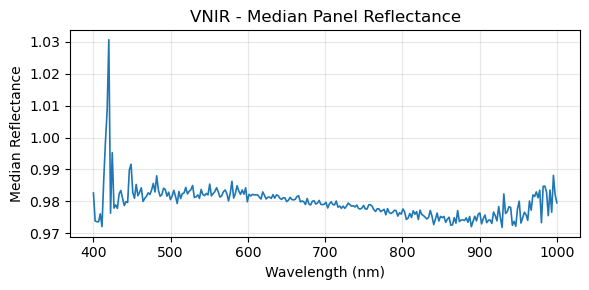

✅ Saved median panel reflectance CSV: reorder_272_2295_640_U16_median_panel_reflectance.csv

🎨 VNIR Scene: 20241002113938_SCN
Loaded cube: reorder_272_2125_640_U16.bin  shape=(640, 2125, 272) (Y=640, X=2125, Bands=272)
Loaded cube: reorder_272_2125_640_U16.bin shape=(640, 2125, 272) (Y=640, X=2125, Bands=272)
✅ Saved reflectance cube: reorder_272_2125_640_U16_reflectance.nc


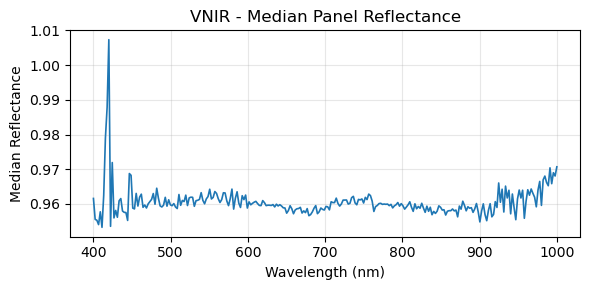

✅ Saved median panel reflectance CSV: reorder_272_2125_640_U16_median_panel_reflectance.csv

🎨 SWIR Scene: 20241002103355
Loaded cube: Reorder_288_2334_384_U16.bin  shape=(384, 2334, 288) (Y=384, X=2334, Bands=288)
Loaded cube: Reorder_288_2334_384_U16.bin shape=(384, 2334, 288) (Y=384, X=2334, Bands=288)
✅ Saved reflectance cube: Reorder_288_2334_384_U16_reflectance.nc


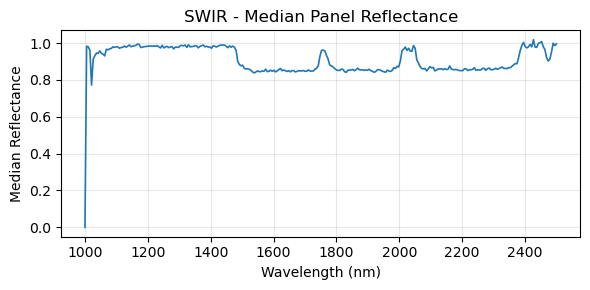

✅ Saved median panel reflectance CSV: Reorder_288_2334_384_U16_median_panel_reflectance.csv

🎨 SWIR Scene: 20241002113938
Loaded cube: Reorder_288_2154_384_U16.bin  shape=(384, 2154, 288) (Y=384, X=2154, Bands=288)
Loaded cube: Reorder_288_2154_384_U16.bin shape=(384, 2154, 288) (Y=384, X=2154, Bands=288)
✅ Saved reflectance cube: Reorder_288_2154_384_U16_reflectance.nc


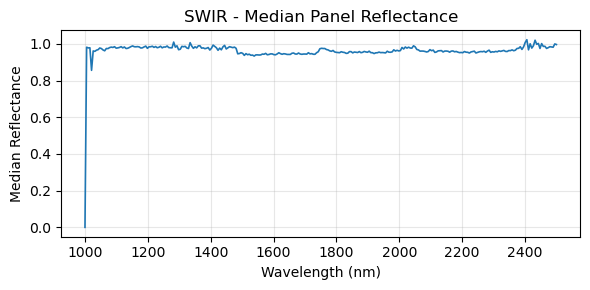

✅ Saved median panel reflectance CSV: Reorder_288_2154_384_U16_median_panel_reflectance.csv

📅 Processing Day Folder: 20250313

🎨 VNIR Scene: 20250313110542_SCN
Loaded cube: reorder_272_1037_640_U16.bin  shape=(640, 1037, 272) (Y=640, X=1037, Bands=272)
Loaded cube: reorder_272_1037_640_U16.bin shape=(640, 1037, 272) (Y=640, X=1037, Bands=272)
✅ Saved reflectance cube: reorder_272_1037_640_U16_reflectance.nc


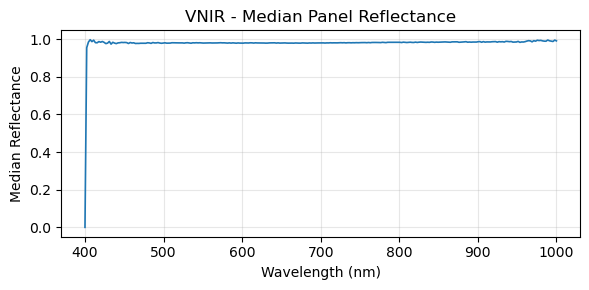

✅ Saved median panel reflectance CSV: reorder_272_1037_640_U16_median_panel_reflectance.csv
⚠️ No VNIR panel JSON found in 20250313113110_SCN.

🎨 SWIR Scene: 20250313110542
Loaded cube: Reorder_288_1075_384_U16.bin  shape=(384, 1075, 288) (Y=384, X=1075, Bands=288)
Loaded cube: Reorder_288_1075_384_U16.bin shape=(384, 1075, 288) (Y=384, X=1075, Bands=288)
✅ Saved reflectance cube: Reorder_288_1075_384_U16_reflectance.nc


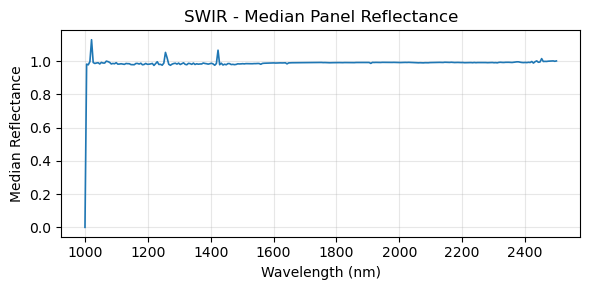

✅ Saved median panel reflectance CSV: Reorder_288_1075_384_U16_median_panel_reflectance.csv
⚠️ No SWIR panel JSON found in 20250313113110.

🌍 All day folders processed successfully.


In [4]:
# ============================================================
# 🌈 Panel-based Reflectance Conversion Pipeline - VNIR & SWIR
# ============================================================

import os
import json
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

# ------------------------------------------------------------
# Configuration
# ------------------------------------------------------------
ROOT_DIR = Path.cwd()
VNIR_FOLDER_NAME = "Hyper"
SWIR_FOLDER_NAME = "SWIR"
PANEL_CAL_FILE = ROOT_DIR / "LARGE_PANEL.txt"

# ------------------------------------------------------------
# Load panel calibration file (wavelength:value)
# ------------------------------------------------------------
panel_cal_data = pd.read_csv(PANEL_CAL_FILE, sep="\t", header=None, names=["wavelength", "value"])
print(f"✅ Loaded panel calibration data: {PANEL_CAL_FILE.name}, {len(panel_cal_data)} wavelengths")

# ------------------------------------------------------------
# Helper Functions
# ------------------------------------------------------------

def read_detection_json(json_path: Path):
    """Read VNIR or SWIR detection JSON and return .bin path + bbox."""
    with open(json_path, "r") as f:
        data = json.load(f)
    bin_path = Path(data["file"]) if "file" in data else None
    bbox = None
    source = "unknown"
    if "bbox" in data and "vnir" in json_path.name.lower():
        bbox = tuple(map(int, data["bbox"]))
        source = "VNIR"
    elif "detected_bbox" in data:
        bbox = tuple(map(int, data["detected_bbox"]))
        source = "SWIR"
    elif "mapped_direct_bbox" in data:
        bbox = tuple(map(int, data["mapped_direct_bbox"]))
        source = "SWIR-mapped"
    else:
        raise KeyError(f"No usable bbox found in JSON: {json_path}")
    return bin_path, bbox, data, source

def extract_panel_region(cube, bbox):
    """Extract panel subcube using bounding box."""
    x1, y1, x2, y2 = map(int, bbox)
    return cube[y1:y2+1, x1:x2+1, :]

def compute_calibration_coeff(panel_cube, panel_cal):
    """Compute per-band calibration coefficient: counts / known reflectance."""
    panel_median = np.nanmedian(panel_cube, axis=(0,1))
    num_bands = len(panel_median)
    cal_interp = np.interp(np.arange(num_bands), panel_cal["wavelength"], panel_cal["value"])
    cal_coeff = panel_median / cal_interp  # DN / known reflectance
    return cal_coeff

def normalize_cube_to_panel(cube, cal_coeff, epsilon=1e-6):
    """Convert raw cube to reflectance using calibration coefficient."""
    safe_coeff = np.where(cal_coeff == 0, epsilon, cal_coeff)
    return cube / safe_coeff  # broadcast along bands

def export_reflectance_netcdf(reflectance_cube, wavelengths, save_path):
    """Save reflectance datacube as NetCDF using netcdf4 engine."""
    ds = xr.Dataset(
        {"reflectance": (("y", "x", "wavelength"), reflectance_cube.astype(np.float32))},
        coords={
            "y": np.arange(reflectance_cube.shape[0]),
            "x": np.arange(reflectance_cube.shape[1]),
            "wavelength": wavelengths
        }
    )
    ds.to_netcdf(save_path, engine='netcdf4')
    print(f"✅ Saved reflectance cube: {save_path.name}")

def quick_reflectance_plot(wavelengths, panel_refl, cube_type, save_csv_path=None):
    """Plot median panel reflectance spectrum and optionally save CSV."""
    plt.figure(figsize=(6, 3))
    plt.plot(wavelengths, panel_refl, lw=1.2)
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Median Reflectance")
    plt.title(f"{cube_type} - Median Panel Reflectance")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    if save_csv_path:
        df = pd.DataFrame({"wavelength_nm": wavelengths, "median_reflectance": panel_refl})
        df.to_csv(save_csv_path, index=False)
        print(f"✅ Saved median panel reflectance CSV: {save_csv_path.name}")

# ------------------------------------------------------------
# Main Processing Function
# ------------------------------------------------------------

def process_day_folder_to_reflectance(day_folder: Path):
    print(f"\n📅 Processing Day Folder: {day_folder.name}")

    # -----------------------
    # VNIR
    # -----------------------
    vnir_base = day_folder / VNIR_FOLDER_NAME
    if vnir_base.exists():
        # --- Explicitly select only *_SCN folders, skip *_DRK ---
        vnir_scan_folders = [p for p in vnir_base.iterdir() if p.is_dir() and p.name.upper().endswith("_SCN")]
        vnir_scan_folders = sorted(vnir_scan_folders)
        if not vnir_scan_folders:
            print(f"⚠️ No VNIR scan folders found in {day_folder.name}, skipping VNIR.")
        for subdir in vnir_scan_folders:
            vnir_json = next(subdir.glob("*_vnir_bbox.json"), None)
            if vnir_json:
                vnir_bin, bbox_vnir, _, src = read_detection_json(vnir_json)
                if not vnir_bin.exists():
                    print(f"⚠️ VNIR .bin not found for {subdir.name}, skipping.")
                    continue
                print(f"\n🎨 VNIR Scene: {subdir.name}")

                from panel_reflectance_pipeline import import_datacube
                vnir_cube, vnir_wavelengths = import_datacube(vnir_bin, verify_orientation=False)
                print(f"Loaded cube: {vnir_bin.name} shape={vnir_cube.shape} (Y={vnir_cube.shape[0]}, X={vnir_cube.shape[1]}, Bands={vnir_cube.shape[2]})")

                # --- Panel calibration coefficient ---
                panel_vnir = extract_panel_region(vnir_cube, bbox_vnir)
                cal_coeff_vnir = compute_calibration_coeff(panel_vnir, panel_cal_data)

                # --- Normalize full cube ---
                cube_reflectance_vnir = normalize_cube_to_panel(vnir_cube, cal_coeff_vnir)

                # --- Save NetCDF ---
                save_path_vnir = vnir_bin.with_name(vnir_bin.stem + "_reflectance.nc")
                export_reflectance_netcdf(cube_reflectance_vnir, vnir_wavelengths, save_path_vnir)

                # --- QA: median panel reflectance ---
                csv_path = vnir_bin.with_name(vnir_bin.stem + "_median_panel_reflectance.csv")
                quick_reflectance_plot(
                    vnir_wavelengths,
                    cube_reflectance_vnir[bbox_vnir[1]:bbox_vnir[3]+1, bbox_vnir[0]:bbox_vnir[2]+1, :].mean(axis=(0,1)),
                    "VNIR",
                    save_csv_path=csv_path
                )
            else:
                print(f"⚠️ No VNIR panel JSON found in {subdir.name}.")
    else:
        print("⚠️ VNIR base folder not found.")

    # -----------------------
    # SWIR
    # -----------------------
    swir_base = day_folder / SWIR_FOLDER_NAME
    if swir_base.exists():
        # --- Only scan folders (no dark filtering assumed needed for SWIR) ---
        swir_scan_folders = [p for p in swir_base.iterdir() if p.is_dir()]
        swir_scan_folders = sorted(swir_scan_folders)
        if not swir_scan_folders:
            print(f"⚠️ No SWIR scan folders found in {day_folder.name}, skipping SWIR.")
        for subdir in swir_scan_folders:
            swir_json = next(subdir.glob("*_swir_local_subcube.json"), None)
            if swir_json:
                swir_bin, bbox_swir, _, src = read_detection_json(swir_json)
                if not swir_bin.exists():
                    print(f"⚠️ SWIR .bin not found for {subdir.name}, skipping.")
                    continue
                print(f"\n🎨 SWIR Scene: {subdir.name}")

                from panel_reflectance_pipeline import import_datacube
                swir_cube, swir_wavelengths = import_datacube(swir_bin, verify_orientation=False)
                print(f"Loaded cube: {swir_bin.name} shape={swir_cube.shape} (Y={swir_cube.shape[0]}, X={swir_cube.shape[1]}, Bands={swir_cube.shape[2]})")

                # --- Panel calibration coefficient ---
                panel_swir = extract_panel_region(swir_cube, bbox_swir)
                cal_coeff_swir = compute_calibration_coeff(panel_swir, panel_cal_data)

                # --- Normalize full cube ---
                cube_reflectance_swir = normalize_cube_to_panel(swir_cube, cal_coeff_swir)

                # --- Save NetCDF ---
                save_path_swir = swir_bin.with_name(swir_bin.stem + "_reflectance.nc")
                export_reflectance_netcdf(cube_reflectance_swir, swir_wavelengths, save_path_swir)

                # --- QA: median panel reflectance ---
                csv_path = swir_bin.with_name(swir_bin.stem + "_median_panel_reflectance.csv")
                quick_reflectance_plot(
                    swir_wavelengths,
                    cube_reflectance_swir[bbox_swir[1]:bbox_swir[3]+1, bbox_swir[0]:bbox_swir[2]+1, :].mean(axis=(0,1)),
                    "SWIR",
                    save_csv_path=csv_path
                )
            else:
                print(f"⚠️ No SWIR panel JSON found in {subdir.name}.")
    else:
        print("⚠️ SWIR base folder not found.")


# ------------------------------------------------------------
# 🔁 Batch Process All Day Folders
# ------------------------------------------------------------
day_folders = [p for p in ROOT_DIR.iterdir() if p.is_dir() and p.name.isdigit()]

for day in sorted(day_folders):
    process_day_folder_to_reflectance(day)

print("\n🌍 All day folders processed successfully.")


In [ ]:
# ============================================================
# 🔍 Interactive NetCDF Reflectance Cube Viewer (default 1550 nm)
# ============================================================

import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path
from ipywidgets import interact, IntSlider
import numpy as np

# -----------------------
# Specify NetCDF file
# -----------------------
nc_path = Path(r"C:\Users\eric\Documents\Spectro_Auto_latest_V\20240917\SWIR\20240917102940\Reorder_288_1657_384_U16_reflectance.nc")
print(f"Loading NetCDF: {nc_path.name}")

# -----------------------
# Load NetCDF cube
# -----------------------
netcdf_reflectance_cube = xr.open_dataset(nc_path)
print(netcdf_reflectance_cube)

# Access the reflectance variable (shape: y, x, wavelength)
reflectance = netcdf_reflectance_cube["reflectance"]
wavelengths = reflectance["wavelength"].values
num_bands = reflectance.shape[2]
print(f"Cube shape (y, x, wavelength): {reflectance.shape}")

# -----------------------
# Find band closest to 1550 nm
# -----------------------
target_wvl = 1550
band_index_1550 = int(np.argmin(np.abs(wavelengths - target_wvl)))
print(f"Closest band to {target_wvl} nm: index {band_index_1550}, wavelength {wavelengths[band_index_1550]:.1f} nm")

# -----------------------
# Display a single band with interactive slider
# -----------------------
def show_band(band_index=band_index_1550):
    plt.figure(figsize=(8,6))
    plt.imshow(reflectance[:,:,band_index], cmap="gray", origin="upper")
    plt.title(f"Reflectance Cube - Band {band_index} (Wavelength {reflectance['wavelength'][band_index].values:.1f} nm)")
    plt.colorbar(label="Reflectance")
    plt.show()

band_slider = IntSlider(min=0, max=num_bands-1, step=1, value=band_index_1550, description="Band")
interact(show_band, band_index=band_slider)
